# Recommender System (movie rating)
A statistical algorithm that seeks to predict users' ratings for a **particular entity**, based on the similarity between then entities or similarity between the users that previously rated those entities. The intuition is that similar types of users are likely to have similar ratings for a set of entities. <br>
**Types of recommender systems:** content-based filtering and collaborative filtering

### content-based filtering
- The similarity between different products is calculated on the basis of attributes of the product. i.e. the similarity between the movie is calculated on the basis of genres, the actors in the movie, the director of the movie, etc. 

### collaborative filtering 
- It leverages the power of the crowd. If user A like products X and Y, and if user B likes product X, there is a fair bit id change that he will like product Y as well.

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
rating=pd.read_csv('https://tinyurl.com/myratingsdata')
movie=pd.read_csv('https://tinyurl.com/mymoviesdata')

In [6]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
rating.shape

(100836, 4)

In [12]:
movie.shape

(9742, 3)

In [14]:
#merge two dataframes into one by movieId
movie_data=pd.merge(rating, movie, on='movieId')
movie_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [17]:
#average rating of each movie
avg_rating=movie_data.groupby('title')['rating'].mean().sort_values(ascending=False)
avg_rating.head()

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

In [19]:
count_rating=movie_data.groupby('title')['rating'].count().sort_values(ascending=False)
count_rating.head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [22]:
#combine average rating and count togeter 
rating_mean_count=pd.DataFrame(avg_rating)
rating_mean_count.head()

,rating
title,
Karlson Returns (1970),5.0
Winter in Prostokvashino (1984),5.0
My Love (2006),5.0
Sorority House Massacre II (1990),5.0
Winnie the Pooh and the Day of Concern (1972),5.0


In [25]:
rating_mean_count['rating_count']=pd.DataFrame(movie_data.groupby('title')['rating'].count())

In [26]:
rating_mean_count.head()

,rating,rating_count
title,,
Karlson Returns (1970),5.0,1
Winter in Prostokvashino (1984),5.0,1
My Love (2006),5.0,1
Sorority House Massacre II (1990),5.0,1
Winnie the Pooh and the Day of Concern (1972),5.0,1


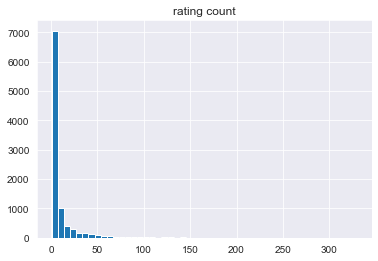

In [33]:
#visulize the distribution of rating count
sns.set_style('dark')
rating_mean_count['rating_count'].hist(bins=50)
plt.title('rating count')
plt.show()

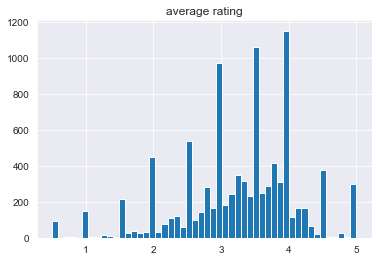

In [35]:
rating_mean_count['rating'].hist(bins=50)
plt.title('average rating')
plt.show()

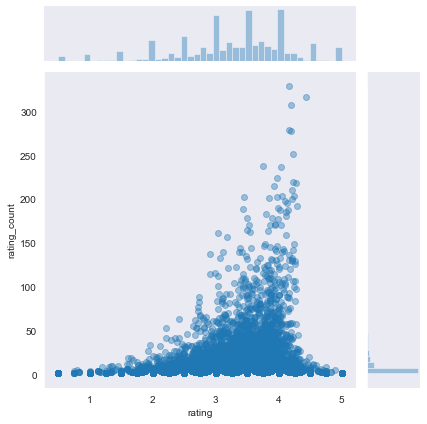

In [37]:
sns.jointplot(x='rating', y='rating_count', data=rating_mean_count, alpha=.4)

We can see that the movie have higher average ratings actually have more number of ratings, however there are also movies with high average like 5.0 but have lower count in the rating 

### find similarities between movies 

In [39]:
#create matrix: rows are the user, columns are the different movie
user_movie_rating=movie_data.pivot_table(index='userId', columns='title', values='rating')
user_movie_rating.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
user_movie_rating.shape

(610, 9719)

We have total 610 users and 9719 different movies. This matrix return to each users' rating on the movie.

In [44]:
#each users rating on Forrest Gump (1994)
forrest_gump_ratings=user_movie_rating['Forrest Gump (1994)']

In [45]:
forrest_gump_ratings.head()

userId
1    4.0
2    NaN
3    NaN
4    NaN
5    NaN
Name: Forrest Gump (1994), dtype: float64

In [49]:
#find the correslation between the user ratings for 'Forrest Gump (1994)' and all 
#the other movies using corrwith()
movies_like_forrest_gump=user_movie_rating.corrwith(forrest_gump_ratings)

In [50]:
movies_like_forrest_gump

title
'71 (2014)                                        NaN
'Hellboy': The Seeds of Creation (2004)           NaN
'Round Midnight (1986)                            NaN
'Salem's Lot (2004)                               NaN
'Til There Was You (1997)                         NaN
                                               ...   
eXistenZ (1999)                              0.011189
xXx (2002)                                   0.306817
xXx: State of the Union (2005)               0.383482
¡Three Amigos! (1986)                        0.449692
À nous la liberté (Freedom for Us) (1931)         NaN
Length: 9719, dtype: float64

In [53]:
#make dataframe for the correlation between Forrest Gump and other movies
corr_forrest_gump=pd.DataFrame(movies_like_forrest_gump, columns=['Correlation'])

In [56]:
#get rid of NA values 
corr_forrest_gump.dropna(inplace=True)
corr_forrest_gump.head()

,Correlation
title,
"'burbs, The (1989)",0.197712
(500) Days of Summer (2009),0.234095
*batteries not included (1987),0.892710
...And Justice for All (1979),0.928571
10 Cent Pistol (2015),-1.000000


In [57]:
#sort correlation
corr_forrest_gump.sort_values('Correlation', ascending=False). head(10)

,Correlation
title,
Lost & Found (1999),1.0
"Century of the Self, The (2002)",1.0
The 5th Wave (2016),1.0
Play Time (a.k.a. Playtime) (1967),1.0
Memories (Memorîzu) (1995),1.0
Playing God (1997),1.0
Killers (2010),1.0
"Girl Walks Home Alone at Night, A (2014)",1.0
Tampopo (1985),1.0


In [71]:
user_movie_rating[['Forrest Gump (1994)', 'Lost & Found (1999)']].dropna()

title,Forrest Gump (1994),Lost & Found (1999)
userId,,
555,5.0,3.0
599,3.5,2.5


From the correlation data, we see that Forrest Gump (1994) is highly correlated with Lost&Found(1999), however there are only two users rate both movies. This indicates that correlation alone is not a good metric for similarity.

In [78]:
#we need to get the the correlated movies with high numbers of ratings 
#add rating_count to the dataframe
#corr_forrest_gump=corr_forrest_gump.join(rating_mean_count['rating_count'])
corr_forrest_gump.head()

,Correlation,rating_count
title,,
"'burbs, The (1989)",0.197712,17
(500) Days of Summer (2009),0.234095,42
*batteries not included (1987),0.892710,7
...And Justice for All (1979),0.928571,3
10 Cent Pistol (2015),-1.000000,2


In [79]:
corr_forrest_gump.loc[['Lost & Found (1999)'],]

,Correlation,rating_count
title,,
Lost & Found (1999),1.0,2


In [84]:
#let's filter movie that have more than 50 ratings 
movie_corr_with_forrest_gump=corr_forrest_gump[corr_forrest_gump['rating_count']>50].sort_values('Correlation',
ascending=False)
movie_corr_with_forrest_gump.head(10)

,Correlation,rating_count
title,,
Forrest Gump (1994),1.000000,329
Mr. Holland's Opus (1995),0.652144,80
Pocahontas (1995),0.550118,68
Grumpier Old Men (1995),0.534682,52
Caddyshack (1980),0.520328,52
"Few Good Men, A (1992)",0.517146,57
Field of Dreams (1989),0.503845,56
Big (1988),0.492351,91
Hook (1991),0.484676,53


This is the top 10 movies that is highly correlated with Forrest Gump.

In [85]:
movie_corr_with_forrest_gump.shape

(437, 2)

In [82]:
user_movie_rating[['Forrest Gump (1994)', 'Caddyshack (1980)']].dropna()

title,Forrest Gump (1994),Caddyshack (1980)
userId,,
42,5.0,4.0
45,5.0,5.0
57,4.0,4.0
63,3.5,2.0
64,4.0,3.0
66,5.0,4.0
68,3.5,4.0
69,4.0,5.0
103,4.0,4.5


We can see that user give similar ratings to Forrest Gump and candyshack.

In [87]:
#now let's see how collabrative filtering with Matrix Factorization 
user_movie_rating.head(10)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In most cases, the cell in the matrix are empty, as user only rate few items. It is hihgly unlikely that every user will rate all items<br>
A matrix with mostly empty cells is called **sparse**, a mostly filled matrix is called **dense**.

### User-based vs Item-based Collaborative Filtering 
- **user based:** for a user U, with a set of similar users, the rating to an item I, which is not rated is determined by calculating the rating based on N similar users. 
- **item-based:** for an item I, with a set of similar items, the rating by a user U, which is unknown, is determined by calculating the rating based on N ratings from the similar items.

In a system where more users than item, Item-based filtering is faster and more stable than user-based. The average rating received by an item dosen't change as quickly as the average rating given by a user to different items. It perform better when the rating matrix is sparse.<br>

However, item-based perform poorly dor dataset with browsing or entertainment related items such as MovieLens. This types of dataset has better results with matrix factorization techniques.

### Algorithms for Matrix Factorization
- Singular Value Decomposition (SVD)
- Autoencoders can also be used if want to use neural networks

In [101]:
from IPython.display import Image
Image(url='https://miro.medium.com/max/1400/1*F5RM9oMnJcWi1oxaEhF0mg.png')

SVD doesn't assume anything about missing values. So missing value imputation is needed for SVD. This might bring in unnecessary noise. But if your ratings matrix not too sparse, SVD might produce better results.

In [120]:
R_df=movie_data.pivot_table(index='userId', columns='title', values='rating').fillna(0)
R_df.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
type(user_movie_rating)

pandas.core.frame.DataFrame

In [127]:
#de-mean the data (normalize by each users mean) and convert it from a dataframe to a numpy array
R=R_df.to_numpy()
user_ratings_mean=np.mean(R, axis=1)
R_demeaned=R-user_ratings_mean.reshape(-1,1)

In [139]:
#use Scipy function for singular value decomposition
from scipy.sparse.linalg import svds
U, sigma, Vt =svds(R_demeaned, k=50)

In [140]:
sigma=np.diag(sigma)
sigma

array([[ 67.86100092,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  68.19375558,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,  69.02327882, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 184.85931669,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
        231.22391483,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 474.18051734]])

### making predictions from the decomposed matrices

In [141]:
all_user_predicted_ratings=np.dot(np.dot(U, sigma), Vt)+user_ratings_mean.reshape(-1,1)
preds_df=pd.DataFrame(all_user_predicted_ratings, columns=R_df.columns)

In [143]:
preds_df.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
0,-0.067955,0.018620,-0.041533,-0.037173,-0.047273,-0.007202,0.549227,-0.008900,-0.607781,0.221628,...,0.014309,-0.459805,0.022586,-0.052623,-0.020094,0.346683,-0.284519,-0.186760,1.499991,0.034606
1,-0.028293,-0.011688,-0.010462,0.001095,-0.002724,-0.007396,0.004290,0.008886,0.150959,-0.005892,...,0.004586,-0.014558,-0.027255,-0.034335,0.016768,0.059210,-0.104489,-0.009522,0.057070,0.000111
2,0.023213,0.009783,0.013288,0.010796,0.010376,0.006465,0.091815,-0.002024,0.016746,-0.003368,...,0.007332,0.045168,0.027881,0.027486,0.006450,0.019643,0.000363,0.013496,0.052682,0.011861
3,-0.008667,0.006796,-0.014741,-0.005001,0.014988,-0.033562,-0.372983,0.009115,-0.204434,0.045343,...,-0.004028,-0.133861,-0.069741,-0.057557,0.004191,0.086672,-0.199954,-0.035476,0.019514,-0.005279
4,0.011838,-0.000451,-0.002750,-0.010783,-0.012690,-0.013753,-0.105477,0.000415,0.022140,-0.093820,...,0.001723,0.047886,0.011493,0.003101,-0.007398,-0.074235,-0.004574,0.044573,-0.091330,-0.001727


### Making movie recommendations 

In [149]:
#build a function to recommend movies for any user-->return the movies with the highest predicted rating 
#that a specified user hasn't already rated, will add content features to get a full recommendations 
def recommend_movies(predictions_df, userId, movies_df, original_ratings_df, num_recommendations=5):
    
    # Get and sort the user's predictions
    user_row_number = userId - 1 # UserId starts at 1, not 0
    sorted_user_predictions = predictions_df.iloc[user_row_number].sort_values(ascending=False)
    
    # Get the user's data and merge in the movie information.
    user_data = original_ratings_df[original_ratings_df.userId == (userId)]
    user_full = (user_data.merge(movies_df, how = 'left', left_on = 'movieId', right_on = 'movieId').
                     sort_values(['rating'], ascending=False)
                 )

    print('User {0} has already rated {1} movies.'.format(userId, user_full.shape[0]))
    print('Recommending the highest {0} predicted ratings movies not already rated.'.format(num_recommendations))
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = (movies_df[~movies_df['movieId'].isin(user_full['movieId'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'movieId',
               right_on = 'movieId').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations


In [150]:
already_rated, predictions = recommend_movies(preds_df, 123, movie, rating, 10)

User 123 has already rated 56 movies.
Recommending the highest 10 predicted ratings movies not already rated.


KeyError: 'movieId'